In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import random
import math
import matplotlib.pyplot as plt

In [ ]:
image1 = Image.open('1.gif')
image1 = image1.resize((512, 512))
array1 = np.array(image1)
array1


array([[ 9,  9,  6, ...,  9,  9,  9],
       [ 9, 10,  9, ..., 12,  9,  9],
       [ 9, 11,  7, ..., 10,  8,  8],
       ...,
       [ 7,  6,  6, ...,  6,  7,  5],
       [ 8,  7,  8, ...,  6,  7,  5],
       [ 9, 10, 10, ...,  6,  6,  5]], dtype=uint8)

In [ ]:
image2 = Image.open('2.gif')
image2 = image2.resize((512, 512))
array2 = np.array(image2)

array([[11, 11,  9, ..., 11, 12, 12],
       [10, 11, 11, ..., 14, 12, 12],
       [10, 11, 10, ..., 12, 11, 12],
       ...,
       [ 9,  8,  7, ...,  6,  7,  7],
       [ 9,  8,  9, ...,  7,  7,  6],
       [10, 11, 12, ...,  6,  7,  6]], dtype=uint8)

In [ ]:
image3 = Image.open('3.gif')
image3 = image3.resize((512, 512))
array3 = np.array(image3)
print(array3[20][156])

18


In [ ]:
image4 = Image.open('4.gif')
image4 = image4.resize((512, 512))
array4 = np.array(image4)


[[28 27 26 ... 18 19 19]
 [29 29 28 ... 19 19 19]
 [29 29 27 ... 21 19 19]
 ...
 [19 17 19 ...  8 13 10]
 [23 19 21 ...  9 17  8]
 [25 24 24 ... 11 17  8]]


In [ ]:

river_points = pd.read_excel('data_river.xlsx',header=None)
np.resize(river_points,(2,50))
river_points = river_points.transpose()
river_points.rename(columns={river_points.columns[0]: 'x',river_points.columns[1]: 'y'},inplace=True)
river_points = np.array(river_points)
for i in range(50):
  river_points[i][:2]-= 1

In [ ]:
nonriver_points = pd.read_excel('data_nonriver.xlsx',header=None)
np.resize(nonriver_points,(2,50))
nonriver_points = nonriver_points.transpose()
nonriver_points.rename(columns={nonriver_points.columns[0]: 'x',nonriver_points.columns[1]: 'y'},inplace=True)
nonriver_points = np.array(nonriver_points)
for i in range(100):
  nonriver_points[i][:2]-= 1

In [ ]:
river_matrix = []
for i in range(50):
  x,y = river_points[i][:2]
  lst = [array1[x][y],array2[x][y],array3[x][y],array4[x][y]]
  river_matrix.append(lst)
river_matrix = np.array(river_matrix,dtype=float)

In [ ]:
nonriver_matrix = []
for i in range(100):
  x,y = nonriver_points[i][:2]
  lst = [array1[x][y],array2[x][y],array3[x][y],array4[x][y]]
  nonriver_matrix.append(lst)

nonriver_matrix = np.array(nonriver_matrix,dtype=float)

In [ ]:
rivermean_matrix = np.zeros((1,4))
rivermean_matrix = np.sum(river_matrix,axis=0)
rivermean_matrix=np.array(rivermean_matrix,dtype=float)
print(rivermean_matrix)
for i in range(4):
    rivermean_matrix[i] =  (rivermean_matrix[i]/50.0)

[601. 696. 865. 372.]


array([12.02, 13.92, 17.3 ,  7.44])

In [ ]:
nonrivermean_matrix = np.zeros((1,4))
nonrivermean_matrix = np.sum(nonriver_matrix, axis=0)
nonrivermean_matrix=np.array(nonrivermean_matrix,dtype=float)
print(nonrivermean_matrix)
for i in range(0,len(nonrivermean_matrix)):
    nonrivermean_matrix[i] /= 100

[ 743.  872. 1125. 1976.]


array([ 7.43,  8.72, 11.25, 19.76])

In [ ]:
# transpose river and non river matrix
for i in range(4):
  river_matrix[:, i] -= rivermean_matrix[i]
  nonriver_matrix[:,i] -= nonrivermean_matrix[i]
rivertranspose_matrix = river_matrix.transpose()
nonrivertranspose_matrix = nonriver_matrix.transpose()
# print(rivertranspose_matrix)
print(river_matrix)
# print(nonrivertranspose_matrix)
print(nonriver_matrix)

[[-0.02  0.08  0.7  -0.44]
 [-0.02  0.08 -0.3  -0.44]
 [-0.02  1.08 -0.3  -0.44]
 [-0.02  0.08 -0.3  -0.44]
 [-0.02  0.08 -0.3  -0.44]
 [ 0.98  0.08  0.7  -1.44]
 [ 0.98  0.08 -0.3   7.56]
 [ 0.98  1.08 -0.3  -1.44]
 [-1.02  0.08 -0.3  -0.44]
 [-1.02 -0.92 -0.3  -0.44]
 [-1.02 -0.92 -0.3  -0.44]
 [-0.02  0.08 -0.3   0.56]
 [-1.02  0.08  0.7  -0.44]
 [ 0.98  1.08  0.7  -0.44]
 [ 0.98  1.08  0.7  -1.44]
 [-0.02  0.08 -0.3  -1.44]
 [-1.02  0.08 -1.3   0.56]
 [-0.02  0.08  0.7  -0.44]
 [-0.02  0.08  0.7  -0.44]
 [-0.02  0.08  0.7   0.56]
 [-0.02  1.08  0.7  -1.44]
 [-1.02  0.08 -0.3  -0.44]
 [-0.02  0.08  0.7   0.56]
 [-0.02 -0.92 -1.3  -0.44]
 [-0.02 -0.92 -0.3  -1.44]
 [ 0.98  0.08 -0.3  -0.44]
 [ 0.98 -0.92 -0.3  -0.44]
 [-1.02  0.08 -0.3  -0.44]
 [ 0.98  0.08  0.7  -0.44]
 [-1.02  0.08 -1.3  -0.44]
 [-0.02 -0.92 -1.3  -0.44]
 [-2.02 -1.92 -3.3   0.56]
 [-1.02 -0.92 -0.3  -0.44]
 [-0.02 -0.92 -0.3  -0.44]
 [-0.02  0.08  0.7  -0.44]
 [ 1.98  2.08  0.7  -1.44]
 [-0.02 -0.92  0.7  -0.44]
 

In [ ]:

river_covariance = np.dot(rivertranspose_matrix, river_matrix)
nonriver_covariance = np.dot(nonrivertranspose_matrix,nonriver_matrix)

print(river_covariance)
print(nonriver_covariance)
river_covariance = river_covariance.astype(float)
nonriver_covariance = nonriver_covariance.astype(float)
river_covariance = river_covariance /50
nonriver_covariance=nonriver_covariance/100
# for i in range(4):
#    river_covariance[:,i] /= rivermean_matrix[i]
#    nonriver_covariance[:,i] /= nonrivermean_matrix[i]
print(river_covariance)
print(nonriver_covariance)


[[ 32.98  17.08  14.7   14.56]
 [ 17.08  27.68  16.2    2.76]
 [ 14.7   16.2   34.5  -10.6 ]
 [ 14.56   2.76 -10.6  152.32]]
[[ 566.51  472.04  692.25  451.32]
 [ 472.04  472.16  684.    515.28]
 [ 692.25  684.   1394.75  648.  ]
 [ 451.32  515.28  648.   3266.24]]
[[ 0.6596  0.3416  0.294   0.2912]
 [ 0.3416  0.5536  0.324   0.0552]
 [ 0.294   0.324   0.69   -0.212 ]
 [ 0.2912  0.0552 -0.212   3.0464]]
[[ 5.6651  4.7204  6.9225  4.5132]
 [ 4.7204  4.7216  6.84    5.1528]
 [ 6.9225  6.84   13.9475  6.48  ]
 [ 4.5132  5.1528  6.48   32.6624]]


In [ ]:
import math
out_class = np.zeros((512,512))
P1 = 0.5
P2 = 0.5
for i in range(512):
  for j in range(512):
    test_data = [array1[i][j], array2[i][j], array3[i][j], array4[i][j]]
    test_data = np.array(test_data)
    river_class = ((np.transpose(test_data - rivermean_matrix)) @ (np.linalg.inv(river_covariance))) @ (test_data - rivermean_matrix)
    nonriver_class = ((np.transpose(test_data - nonrivermean_matrix)) @ (np.linalg.inv(nonriver_covariance))) @ (test_data - nonrivermean_matrix)
    # print(river_class)
    # print(nonriver_class)
    # x=input()
    p1 = (((np.exp(-0.5*(river_class)))) / (math.sqrt(np.linalg.det(river_covariance))))
    p2 = (( (np.exp(-0.5*(nonriver_class)))) / (math.sqrt(np.linalg.det(nonriver_covariance)) ))
    if((P1*p1) >= (P2*p2)):
      out_class[i][j] = 255
    else:
      out_class[i][j] = 1


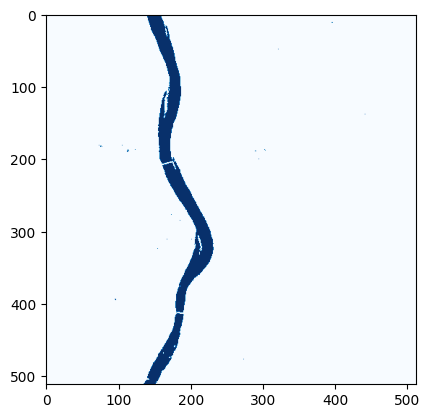

In [ ]:
plt.imshow(out_class, cmap='Blues')